# Shark Attacks

## Proyecto 1:

#### 1 - Estan creciendo o decreciendo los ataques de tiburones? (YoY) / A partir del 2000

## Proyecto 2:

#### 1 - Que probabilidad hay de muerte por ataque de tiburon?
#### 2 - Que actividad es la que más atrae a los ataques de los tiburones?
#### 3 - Hay correlacion entre la actividad, la especie de tiburon y la fatalidad del ataque?

## Proyecto 3:

#### 1 - Cuales son los 5 paises con mas ataques de tiburones? 
#### 2 - Cuales son los meses del año con más ataques de tiburones? 
#### 3 - Que temporada es?
#### 4 - Pertenecen a una misma región?
#### 5 - Tiene correlación los ataques de tiburones y la temporada?


### Readme:
    -Foto
    -Hipotesis y breve resumen
    -Estructura de archivos y carpetas
    -Librerias utilizadas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import src.cleaning_utils as cl

In [2]:
# Permite cambiar el tamaño de todos los graficos que vayas a realizar de ahora en adelante

matplotlib.rcParams['figure.figsize'] = (20, 10)

In [3]:
data = pd.read_csv("./attacks_limpio.csv")

In [4]:
data

,case_number,date,year,type,country,area,activity,fatal,species,pdf
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,Paddling,N,White shark,2018.06.25-Wolfe.pdf
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,Standing,N,NaN,2018.06.18-McNeely.pdf
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,Surfing,N,NaN,2018.06.09-Denges.pdf
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Surfing,N,2 m shark,2018.06.08-Arrawarra.pdf
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,Free diving,N,"Tiger shark, 3m",2018.06.04-Ramos.pdf
...,...,...,...,...,...,...,...,...,...,...
6296,ND.0006,Before 1906,0,Unprovoked,AUSTRALIA,New South Wales,Swimming,Y,Said to involve a grey nurse shark that leapt ...,ND-0006-ArabBoy-Prymount.pdf
6297,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Diving,Y,NaN,ND-0005-RoebuckBay.pdf
6298,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Pearl diving,Y,NaN,ND-0004-Ahmun.pdf
6299,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Swimming,Y,NaN,ND-0003-Ocracoke_1900-1905.pdf


# Proyecto 1:

In [5]:
# Seleccionamos solo los años del 2000 o posteriores

df_years = data[data.year >= 2000]

<AxesSubplot:xlabel='year', ylabel='count'>

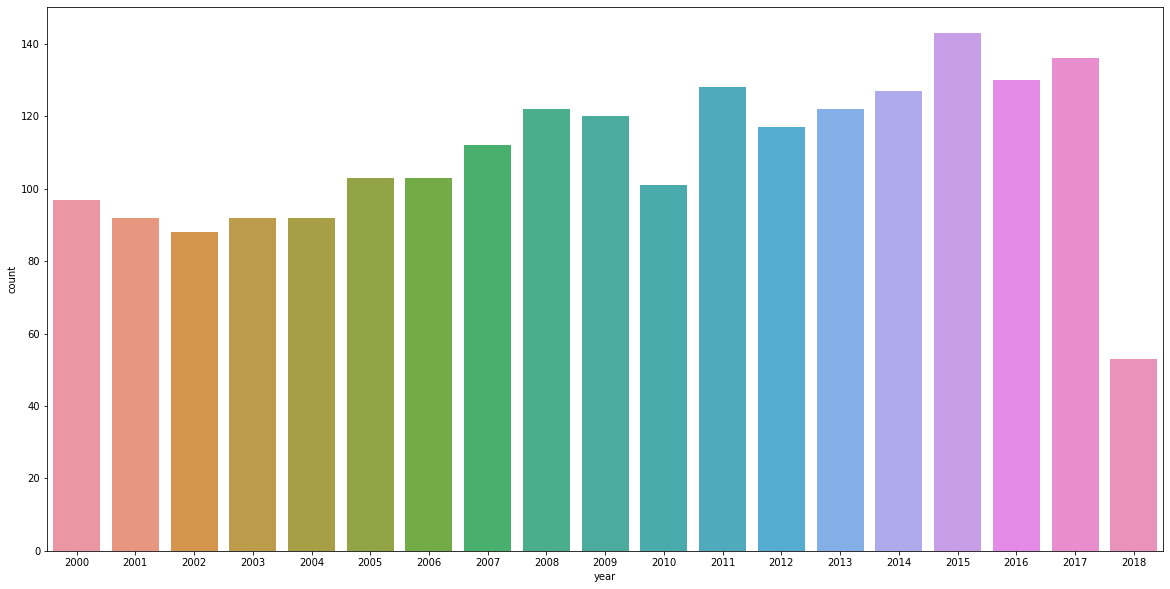

In [6]:
sns.countplot(x=df_years.year)

#### Podemos observar claramente el crecimiento de los ataques de tiburones año contra año, que puede estar dado por varios factores. Algunos pueden ser:
    -Aumento de cantidad de tiburones
    -Aumento en la cantidad de medidas capturadas
   
#### Aclaración en el 2018 solo tenemos datos de la primera mitad del año.

In [7]:
# We calculate the mean of deaths per year

year_deaths_mean = df_years[df_years.fatal == "Y"].year.value_counts().mean()
year_deaths_mean

9.210526315789474

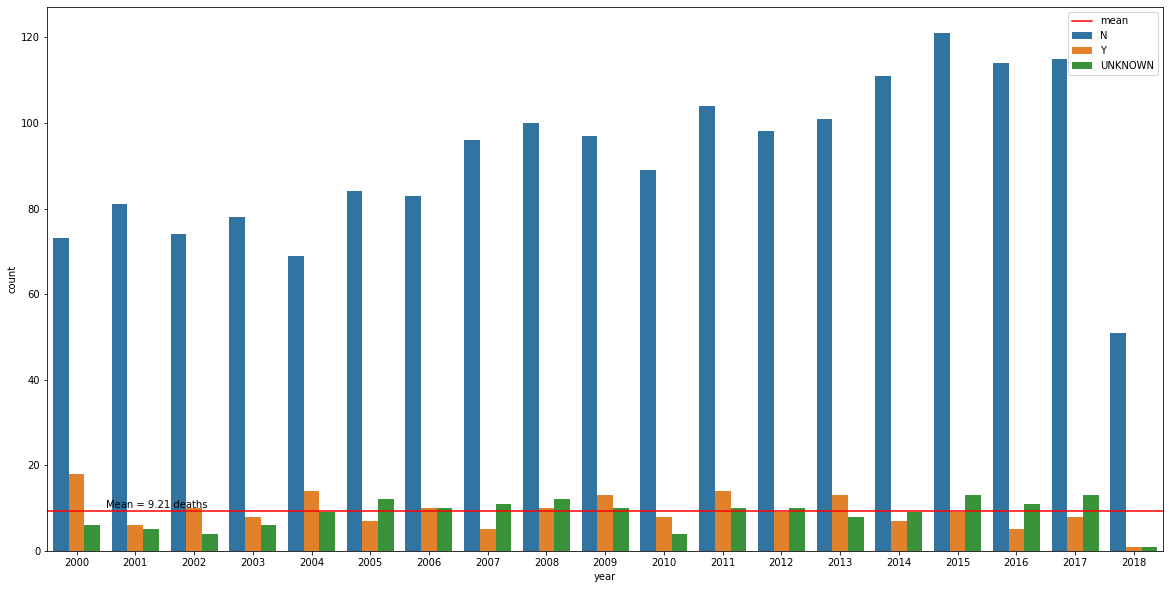

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.countplot(x=df_years.year, hue=df_years.fatal, ax=ax)

ax.axhline(y=year_deaths_mean, c="red", label="mean")
ax.legend()

ax.annotate("Mean = 9.21 deaths", xy=(0.5,10))

fig.show()

#### Podemos observar también que mas alla del aumento de los ataques de tiburones, no hubo un incremento en la fatalidad de los mismos. Si, se puede observar un crecimiento claro en los ataques no fatales.

#### El esto puede estar dado por varios factores: 
    -Por una mejor respuesta o aumento de las personas de seguridad en las playas
    -Por una mejor respuesta en los servicios de salud.


# Proyecto 2

#### 1 - Que probabilidad hay de muerte por ataque de tiburon por año?

In [9]:
deaths = df_years.groupby("year")["fatal"].value_counts()

In [10]:
deaths

year  fatal  
2000  N           73
      Y           18
      UNKNOWN      6
2001  N           81
      Y            6
      UNKNOWN      5
2002  N           74
      Y           10
      UNKNOWN      4
2003  N           78
      Y            8
      UNKNOWN      6
2004  N           69
      Y           14
      UNKNOWN      9
2005  N           84
      UNKNOWN     12
      Y            7
2006  N           83
      UNKNOWN     10
      Y           10
2007  N           96
      UNKNOWN     11
      Y            5
2008  N          100
      UNKNOWN     12
      Y           10
2009  N           97
      Y           13
      UNKNOWN     10
2010  N           89
      Y            8
      UNKNOWN      4
2011  N          104
      Y           14
      UNKNOWN     10
2012  N           98
      UNKNOWN     10
      Y            9
2013  N          101
      Y           13
      UNKNOWN      8
2014  N          111
      UNKNOWN      9
      Y            7
2015  N          121
      UNKNOWN     13

In [11]:
prob_death_year = {}
year = 2000

while year <= 2018:
    prob_death_year[year] = ((deaths[year]["Y"]/(deaths[year]["N"] + deaths[year]["Y"]))*100).round(2)
    year += 1

In [12]:
prob_death_year

{2000: 19.78,
 2001: 6.9,
 2002: 11.9,
 2003: 9.3,
 2004: 16.87,
 2005: 7.69,
 2006: 10.75,
 2007: 4.95,
 2008: 9.09,
 2009: 11.82,
 2010: 8.25,
 2011: 11.86,
 2012: 8.41,
 2013: 11.4,
 2014: 5.93,
 2015: 6.92,
 2016: 4.2,
 2017: 6.5,
 2018: 1.92}

In [13]:
# Probability of die by a shark attack

pd_death_year = pd.DataFrame(prob_death_year, index=[0]).T

In [14]:
pd_death_year = pd_death_year.reset_index()

In [15]:
columns = ["year","avg_death"]

pd_death_year = cl.change_column_name(pd_death_year,columns)

Calculamos varios datos estadisticos anuales de probabilidad de muerte:

In [16]:
pd_death_year.describe()

,year,avg_death
count,19.000000,19.000000
mean,2009.000000,9.181053
std,5.627314,4.266094
min,2000.000000,1.920000
25%,2004.500000,6.700000
50%,2009.000000,8.410000
75%,2013.500000,11.610000
max,2018.000000,19.780000


El promedio anual de probabilidad de muerte es de 9,18%.

In [17]:
years = list(prob_death_year.keys())

<AxesSubplot:xlabel='Year', ylabel='Death probability'>

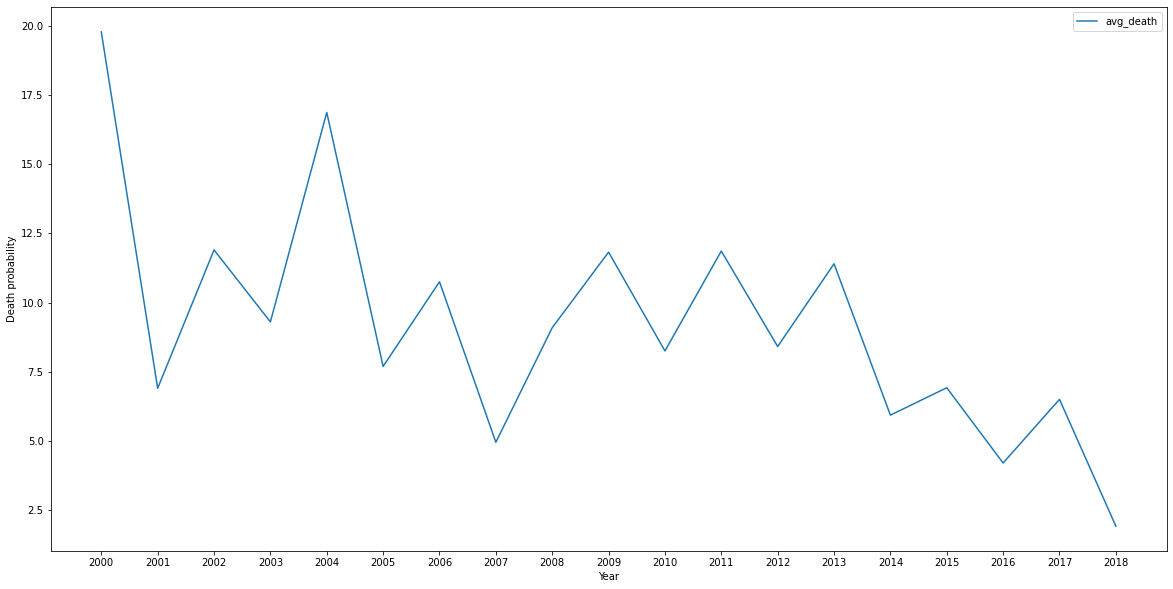

In [18]:
pd_death_year.plot(x="year",y="avg_death",ylabel="Death probability",xlabel="Year",xticks=years)

Como corroboramos anteriormente la probilidad de morir por ataque de tiburon esta descendiendo considerablemente año contra año

#### 2 - Que actividad es la que más atrae a los ataques de los tiburones?

In [19]:
data["activity"].value_counts().head(10)

Surfing         971
Swimming        868
Fishing         431
Spearfishing    333
Bathing         162
Wading          149
Diving          127
Standing         99
Snorkeling       89
Scuba diving     76
Name: activity, dtype: int64

In [20]:
lst = ["Surfing","Swimming","Fishing","Spearfishing","Bathing","Wading","Diving","Standing","Snorkeling","Scuba diving"]

activity_death = data[data["activity"].isin(lst)]

<AxesSubplot:xlabel='activity', ylabel='count'>

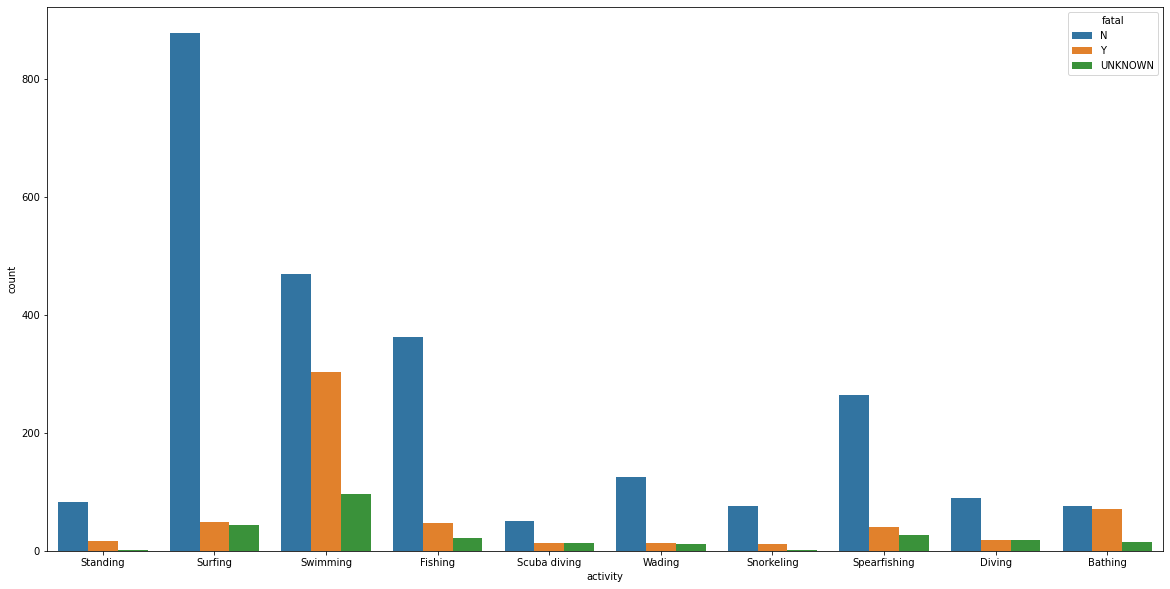

In [21]:
sns.countplot(x=activity_death["activity"],hue=activity_death["fatal"])

Podemos inferir en base a este grafico que las actividades que se realizan en mar adentro tienen una tasa mayor de ataque de tiburones, dentro de las cuales la que mayor tasa de mortandad tiene son las que se realizan sin equipamiento alguno como "Swimming" y "Bathing", a diferencia del "Surfing","Snorkeling" y "Spearfishing". Esto podría deberse a la capacidad de frente a un ataque tener recursos para poder escaparse de manera más rapida.

Por otro lado, actividades que usualmente no se realizan mar adentro como "Fishing", "Standing", "Wading" tienen menos incidencias de ataques.

Sería excelente poder investigar un poco más para poder confirmar estas hipotesis.

#### 3 - Hay correlacion entre la actividad, la especie de tiburon y la fatalidad del ataque?

In [22]:
species_death = data.groupby("species")["fatal"].value_counts()

In [23]:
data.species.value_counts().head(20)

White shark                                           163
Shark involvement prior to death was not confirmed    105
Invalid                                               102
Shark involvement not confirmed                        88
Tiger shark                                            73
Shark involvement prior to death unconfirmed           68
Bull shark                                             52
4' shark                                               40
6' shark                                               40
Questionable incident                                  35
1.8 m [6'] shark                                       35
Questionable                                           34
1.5 m [5'] shark                                       32
1.2 m [4'] shark                                       27
5' shark                                               26
3' shark                                               26
2 m shark                                              25
4' to 5' shark

Información extremadamente sucia, habría que limpiarla mucho para poder realizar la correlación entre la especie de tiburon y tasa de mortalidad.
Hay mucha información sobre el tamaño de los tiburones pero muy poca sobre la especie en sí, el analisis sería muy pobre.